# make_pooled_injection_volumes
In this notebook I make the injection volumes that combine the masks from each timepoint into a single volume

In [61]:
import neuroglancer as ng
import matplotlib,os
import numpy as np
import tifffile
from scipy.ndimage import gaussian_filter, binary_erosion

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
ng.set_static_content_source(url='https://neuroglancer-braincogs.appspot.com')

In [64]:
home_dir = '/home/ahoag/progs/pisano_etal_injections'
viz_dir = os.path.join(home_dir,'precomputed')
datasets = ['HSV-H129_Disynaptic','HSV-H129_Trisynaptic','PRV_Disynaptic']
pma_shape = (540,640,352)
for dataset in datasets:
    print(dataset)
    savename = f'../data/merged_volumes/{dataset}_merged.tif'
    if os.path.exists(savename):
        print(f"{savename} already exists. Skipping")
        continue
    merged_vol = np.zeros(pma_shape)
    dataset_dir = os.path.join(viz_dir,dataset)
    sample_names = [x for x in os.listdir(dataset_dir) if x!='progress_dirs']
    print(sample_names)
    for sample_name in sample_names:
        print(sample_name)
        if dataset in ['HSV-H129_Disynaptic','HSV-H129_Trisynaptic']:
            inj_file = os.path.join(home_dir,'data',dataset,
                f'{sample_name}.tif.tif')
        else:
            inj_file = os.path.join(home_dir,'data',dataset,
                f'{sample_name}.tif')
        
        image = np.array(tifffile.imread(inj_file),dtype=np.uint8, order='F')
        if dataset in ['PRV_Disynaptic']:
            print("Cropping, blurring and eroding")
            # Crop, then blur and erode
            image = image[:,450:,:]
            image = gaussian_filter(image,sigma=1)
            image[image!=0] = 1
            image = binary_erosion(image).astype('uint8')
        z_dim,y_dim,x_dim = image.shape
        voxel_offset_y = 640-y_dim
#         voxel_offset=[0,voxel_offset_y,0]
        merged_vol[:,voxel_offset_y:,:] += image
    # Finally, anything > 0 gets set to 1
    merged_vol[merged_vol!=0] = 1
    tifffile.imsave(savename,merged_vol.astype('uint8'))
    print(f"Saved {savename}")

HSV-H129_Disynaptic
../data/merged_volumes/HSV-H129_Disynaptic_merged.tif already exists. Skipping
HSV-H129_Trisynaptic
../data/merged_volumes/HSV-H129_Trisynaptic_merged.tif already exists. Skipping
PRV_Disynaptic
['20180205_jg_bl6f_prv_01', '20180322_jg_bl6f_prv_28', '20180312_jg_bl6f_prv_17', '20180215_jg_bl6f_prv_05', '20180326_jg_bl6f_prv_34', '20180322_jg_bl6f_prv_27', '20180305_jg_bl6f_prv_11', '20180215_jg_bl6f_prv_06', '20180205_jg_bl6f_prv_04', '20180326_jg_bl6f_prv_37', '20180205_jg_bl6f_prv_02', '20180313_jg_bl6f_prv_25', '20180322_jg_bl6f_prv_26', '20180313_jg_bl6f_prv_20', '20180323_jg_bl6f_prv_30', '20180313_jg_bl6f_prv_23', '20180305_jg_bl6f_prv_13', '20180313_jg_bl6f_prv_21', '20180306_jg_bl6f_prv_16', '20180215_jg_bl6f_prv_08', '20180215_jg_bl6f_prv_07', '20180326_jg_bl6f_prv_36', '20180306_jg_bl6f_prv_14', '20180305_jg_bl6f_prv_12', '20180305_jg_bl6f_prv_15', '20180215_jg_bl6f_prv_09', '20180326_jg_bl6f_prv_35', '20180313_jg_bl6f_prv_24', '20180326_jg_bl6f_prv_33', '

In [52]:
merged_vol.dtype

dtype('float64')

In [53]:
np.unique(merged_vol)

array([0., 1.])

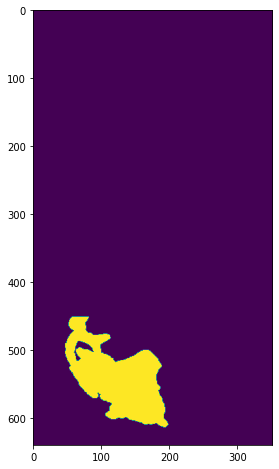

In [65]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.imshow(merged_vol[260])